# <b>Capstone Project - The Battle of the Neighborhoods (Week 2)</b>

## <b>Applied Data Science Capstone by IBM/Coursera</b>


###  <b>Table Of contents</b>

<ul>
<li>Introduction: Business Problem</li>
<li>Data</li>
<li>Methodology</li>
<li>Analysis</li>
<li>Results and Discussion</li>
<li>Conclusion</li>
</ul>

###  <b>Introduction: Business Problem</b>

In this project we will try to find an optimal location for a restaurant. Specifically, this report will be targeted to stakeholders interested in opening an <b>Italian restaurant</b> in <b>Hyderabad, India</b> which is one of the major software development center in India for many Top IT Companies in the world .

Since there are lots of Italian restaurants in Hyderabad we will try to detect locations that are not already crowded with restaurants. We are also particularly interested in areas with no Italian restaurants in vicinity. We would also prefer locations as close to city center or close to IT Hub in the City as possible, assuming that first two conditions are met.

We will use our data science powers to generate a few most promissing neighborhoods based on this criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.


## Data <a name="data"></a>

<p>Based on definition of our problem, factors that will influence our decission are:</p>

<ul>
<li> number of Italian restaurants in the City with in 10km , 20km , 30km from the City center </li>
<li> Distance of neighborhood from city center or IT hub of the City (distance from City center or City IT hub can be preferred for preferred location) </li>

Hyderabad City Center Location coordinates are fetched using <b>Foursquare</b> api and all the restaurants data of Hyderabad is fetched using <b>ZOMATO api</b>

Centers of candidate areas will be generated algorithmically and number of restaurants and their type and location in every neighborhood will be obtained using zomato API


### Neighborhood Candidates

Let's create latitude & longitude coordinates for centroids of our candidate neighborhoods. We will create a grid of cells covering our area of interest which is aprox. 12x12 killometers centered around Hyderabad city center.

Let's first find the latitude & longitude of Hyderabad city center, using specific, well known address and Google Maps geocoding API.

<b>Import necessary Libraries</b>

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
import requests
print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


In [3]:

address = 'Hyderabad, IN'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

hyderabad_center=[latitude,longitude]


17.38878595 78.46106473453146


In [4]:
CLIENT_ID = '5OQS3DYASM0FO30W2HBCLK45VLGTKYE2UYDIXHITZHTTUOZN' # your Foursquare ID
CLIENT_SECRET = 'O0JUA2N4RSDAS0YUS3XSL2GUNK1SV0HIVUVL0NCJ4WRTH503' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()


Your credentails:
CLIENT_ID: 5OQS3DYASM0FO30W2HBCLK45VLGTKYE2UYDIXHITZHTTUOZN
CLIENT_SECRET:O0JUA2N4RSDAS0YUS3XSL2GUNK1SV0HIVUVL0NCJ4WRTH503


In [5]:
import requests
import json

In [6]:
def extract_values(obj, key):
    """Pull all values of specified key from nested JSON."""
    arr = []

    def extract(obj, arr, key):
        """Recursively search for values of key in JSON tree."""
        if isinstance(obj, dict):
            for k, v in obj.items():
                if isinstance(v, (dict, list)):
                    extract(v, arr, key)
                elif k == key:
                    arr.append(v)
                    
        elif isinstance(obj, list):
            for item in obj:
                extract(item, arr, key)
        return arr

    results = extract(obj, arr, key)
    return results

<b>Zomato API</b> is used to fetch all the restaurants data of Hyderabad with the help of Unique key. 

In [7]:
#Used headers/agent because the request was timed out and asking for an agent. 
#Using following code we can fake the agent.
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'}
i=0

def handleZomatoData(i):
    ItalianRestaurantsdataUrl = "https://developers.zomato.com/api/v2.1/search?entity_id=7000&entity_type=zone&start={}&count=20&lat={}&lon={}&radius=60000&cuisines=55&sort=rating&order=desc".format(
                            i,latitude, longitude)       
    header = {"User-agent": "curl/7.43.0", "Accept": "application/json", "user_key": "ddc167aeb6960b22bcb23e5a5263a50f"}
    response = requests.get(ItalianRestaurantsdataUrl, headers=header).json()
    return response

Consolidate the latitudes , longitudes , cuisines and Locality related data.

In [8]:
allLatitudes = []
allLongitudes = []
allLocalities = []
allCuisines = []
i=0
while i < 200:
    response = handleZomatoData(i)
    print('sunny .. i is {}'.format(i))    
    latitudes = extract_values(response, 'latitude')
    allLatitudes = allLatitudes+latitudes
    longitudes = extract_values(response, 'longitude')
    allLongitudes = allLongitudes+longitudes
    locality = extract_values(response,'locality')
    allLocalities = allLocalities+locality
    cuisines = extract_values(response,'cuisines')
    allCuisines = allCuisines+cuisines
    i = i+20


sunny .. i is 0
sunny .. i is 20
sunny .. i is 40
sunny .. i is 60
sunny .. i is 80
sunny .. i is 100
sunny .. i is 120
sunny .. i is 140
sunny .. i is 160
sunny .. i is 180


In [9]:
# fetched data frmaed into dataframe
Italian_lat_long_df =pd.DataFrame(list(zip(allLatitudes, allLongitudes,allLocalities,allCuisines)),columns =['latitude', 'longitude','locality','cuisines'])
#Italian_lat_long_df = Italian_lat_long_df.sort_values('locality')

Italian_lat_long_df['latitude'] = Italian_lat_long_df['latitude'].astype(float)
Italian_lat_long_df['longitude'] = Italian_lat_long_df['longitude'].astype(float)

Italian_lat_long_df

,latitude,longitude,locality,cuisines
0,17.437113,78.399917,Jubilee Hills,"Cafe, Bakery, Italian, Desserts"
1,17.416618,78.410692,Film Nagar,"Desserts, Cafe, Italian"
2,17.435744,78.457869,Begumpet,"North Indian, Chinese, South Indian, Bakery"
3,17.423434,78.431609,Banjara Hills,"Cafe, American, Continental, Italian"
4,17.433380,78.405089,Jubilee Hills,"American, Healthy Food, Mexican, Desserts"
...,...,...,...,...
95,17.443548,78.368384,Gachibowli,Bakery
96,17.404941,78.476671,Basheer Bagh,"Fast Food, Street Food, Ice Cream, Desserts, B..."
97,17.448024,78.378759,Hitech City,"Cafe, Desserts"
98,17.423808,78.412692,Jubilee Hills,"Fast Food, Salad"


In [40]:
# create map of hyderabad with Italian restaurants using latitude and longitude values
map_Hyderabad = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(Italian_lat_long_df['latitude'], Italian_lat_long_df['longitude'], Italian_lat_long_df['locality']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Hyderabad)  
    
map_Hyderabad

Now , Lets get the locality wise counts for the italian restaurants in Hyderabad

In [192]:
Italian_lat_long_df['locality'].value_counts()

Jubilee Hills                                   24
Gachibowli                                      13
Madhapur                                        11
Banjara Hills                                   11
Hitech City                                      9
Film Nagar                                       7
Begumpet                                         4
Himayath Nagar                                   2
Somajiguda                                       2
Sheraton Hyderabad Hotel, Gachibowli             2
Taj Falaknuma, Falaknuma                         1
Kompally                                         1
Falaknuma                                        1
Miyapur                                          1
Inorbit Mall, Hitech City                        1
Basheer Bagh                                     1
Holiday Inn Express & Suites                     1
Hyderabad Marriott Hotel & Convention Centre     1
Kondapur                                         1
Aalankrita Resort, Shamirpet   

## Methodology <a name="methodology"></a>

In this project we will direct our efforts on detecting areas of <b>Hyderabad</b> that have low restaurant density, particularly those with low number of Italian restaurants. We will do our analysis to area ~10km ~20km ~30km around Hyderabad city center or 10km around <b>Hyderabad IT Hub , Mindspace Tech Park</b>.

In first step we have collected the required **data: location and co-ordinates of every restaurant within 6km from Hyderabad center** (Nampally). We have also **identified Italian restaurants** (according to Zomato API categorization).

Second step in our analysis will be calculation and exploration of '**restaurant density**' across different areas of Hyderabad - we will use **heatmaps** to identify a few promising areas close to center with low number of restaurants in general (*and* no Italian restaurants in vicinity) and focus our attention on those areas.

In third and final step we will focus on most promising areas and within those create **clusters of locations that meet some basic requirements** established in discussion with stakeholders: we will take into consideration cluster locations with **no more than two restaurants in radius of 250 meters**.

In [11]:
from folium import plugins
from folium.plugins import HeatMap

# convert to (n, 2) nd-array format for heatmap
locations =  Italian_lat_long_df[['latitude', 'longitude']].astype('float')

locations.dtypes
locations.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
latitude     100 non-null float64
longitude    100 non-null float64
dtypes: float64(2)
memory usage: 1.7 KB


In [41]:
 #List comprehension to make out list of lists
heat_data = [[row['latitude'],row['longitude']] for index, row in locations.iterrows()]

# plot heatmap
map_Hyderabad.add_child(plugins.HeatMap(heat_data, radius=15))
map_berlin = folium.Map(location=hyderabad_center, zoom_start=10)
folium.TileLayer('cartodbpositron').add_to(map_Hyderabad) #cartodbpositron cartodbdark_matter
HeatMap(heat_data).add_to(map_Hyderabad)
folium.Marker(hyderabad_center).add_to(map_Hyderabad)
folium.Circle(hyderabad_center, radius=10000, fill=False, color='white').add_to(map_Hyderabad)
folium.Circle(hyderabad_center, radius=20000, fill=False, color='green').add_to(map_Hyderabad)
folium.Circle(hyderabad_center, radius=30000, fill=False, color='red').add_to(map_Hyderabad)
map_Hyderabad

### Nampally , Madhapur and Gachibowli  in Hyderabad

Analysis of popular travel guides and web sites often mention Hyderabad as beautifull, interesting, rich with culture, 'cool' Hyderabad neighborhoods popular with tourists and loved by Hyderabadis.

* Hyderabad is one of the frequented tourist cities in India for its unique and rich culture, tradition and hues of Nizams. The presence and development of infrastructure in terms of financial industry, information technology industry, Business Process Output and Health Care industry has drove Hyderabad to one of the important commercial hubs in India. Nonetheless the city is nestling amidst the hues of Deccan terrain as well as the Eastern Ghats.  

* Hyderabad encircles some of India’s prominent cities that can be reached within a day.

Popular with tourists, booming and trendy, relatively close to city center and well connected, those boroughs appear to justify further analysis.

Let's define new, more narrow region of interest, which will include low-restaurant-count parts of  3 regions .

1. Madhapur , Gachibowli which are major IT Hub regions , where almost 5 Lakh Software Engineers from around the world work in Hyderabad and    

2. Nampally , Hyderabad City Center.

 The Heat map and dataframe shows that , almost 24 Italian restaurants are located near to the Hyderabad city center,
 though IT hub is far from Hyderabad city center , we can search for exact location at  Hyderabd IT Hub locations Madhapur and Gachobowli

Let us now cluster those locations to create centers of zones containing good locations. Those zones, their centers and addresses will be the final result of our analysis. 

In [13]:
df_good_locations_temp = Italian_lat_long_df

Italian_lat_long_df['locality'].unique()


array(['Jubilee Hills', 'Film Nagar', 'Begumpet', 'Banjara Hills',
       'Madhapur', 'Gachibowli', 'Necklace Road', 'Kompally',
       'Hitech City', 'Miyapur', 'Falaknuma', 'The Park, Somajiguda',
       'Sheraton Hyderabad Hotel, Gachibowli', 'Somajiguda',
       'Aalankrita Resort, Shamirpet', 'ITC Kohenur',
       'Taj Falaknuma, Falaknuma', 'The Golkonda Resorts & Spa, Gandipet',
       'Himayath Nagar', 'Kondapur', 'Tolichowki',
       'Holiday Inn Express & Suites',
       'Hyderabad Marriott Hotel & Convention Centre', 'Basheer Bagh'],
      dtype=object)

In [14]:

goodAreas = ['Madhapur', 'Gachibowli','Kondapur']


df_good_locations_temp= df_good_locations_temp[df_good_locations_temp.locality.isin(goodAreas)]
df_good_locations = pd.DataFrame(columns=['latitude', 'longitude'])
df_good_locations['latitude'] = df_good_locations_temp['latitude']
df_good_locations['longitude'] = df_good_locations_temp['longitude']
df_good_locations.shape


(25, 2)

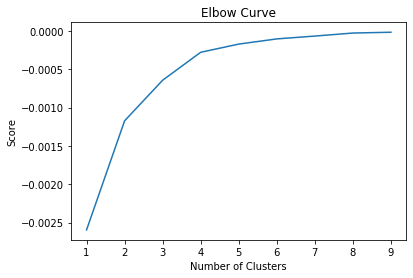

In [16]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_good_locations[['latitude']]
X_axis = df_good_locations[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) 
for i in range(len(kmeans))]# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [17]:

X=df_good_locations.loc[:,['latitude','longitude']]
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) 
# Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ 
# Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:2]]) 
# Labels of each pointX.
X.head(10)

,latitude,longitude,cluster_label
5,17.443759,78.387385,1
6,17.435501,78.368106,0
8,17.435849,78.368189,0
10,17.440206,78.362038,0
13,17.446683,78.384505,1
19,17.410927,78.331905,2
26,17.438271,78.395759,1
30,17.439358,78.397999,1
34,17.430762,78.373558,0
35,17.442758,78.355371,0


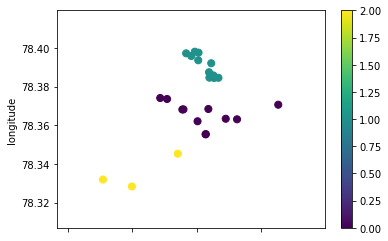

In [18]:
X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')


In [28]:
from sklearn.cluster import KMeans

number_of_clusters = 4


heat_data = [[row['latitude'],row['longitude']]
             
for index, row in df_good_locations.iterrows()]
kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(df_good_locations)

cluster_centers = [df_good_locations for cc in kmeans.cluster_centers_]

cluster_centers

[     latitude  longitude
 5   17.443759  78.387385
 6   17.435501  78.368106
 8   17.435849  78.368189
 10  17.440206  78.362038
 13  17.446683  78.384505
 19  17.410927  78.331905
 26  17.438271  78.395759
 30  17.439358  78.397999
 34  17.430762  78.373558
 35  17.442758  78.355371
 37  17.445136  78.385726
 39  17.434099  78.345288
 41  17.452428  78.363044
 45  17.445316  78.384418
 50  17.442696  78.355287
 52  17.428645  78.374062
 57  17.443871  78.384570
 59  17.448927  78.363333
 71  17.465192  78.370591
 74  17.444438  78.392030
 75  17.436672  78.397162
 76  17.440511  78.397504
 87  17.419882  78.328333
 94  17.440416  78.393570
 95  17.443548  78.368384,      latitude  longitude
 5   17.443759  78.387385
 6   17.435501  78.368106
 8   17.435849  78.368189
 10  17.440206  78.362038
 13  17.446683  78.384505
 19  17.410927  78.331905
 26  17.438271  78.395759
 30  17.439358  78.397999
 34  17.430762  78.373558
 35  17.442758  78.355371
 37  17.445136  78.385726
 39  17.4340

In [39]:
map_hyderabad = folium.Map(location=hyderabad_center, zoom_start=14)
folium.TileLayer('cartodbpositron').add_to(map_hyderabad)
HeatMap(heat_data).add_to(map_hyderabad)
folium.Circle(hyderabad_center, radius=2500, color='white', fill=True, fill_opacity=0.4).add_to(map_hyderabad)
folium.Marker(hyderabad_center).add_to(map_hyderabad) 
for lat, lon in zip(df_good_locations['latitude'], df_good_locations['longitude']):
    folium.CircleMarker([lat, lon], radius=2, color='blue', fill=True, fill_color='blue', fill_opacity=1).add_to(map_hyderabad)
map_hyderabad

## Conclusions

Hence , we explored the data from Zomato api , to get the list of Italian restaurants by their location co-ordinates , framed the data into a pandas data frame , analyzed the data , plotted the folium maps to show the core density of restaurants in the Hyderabad city and showed that stake holders can consider near IT Hub , rather than city Centre which is already cluttered with Italian restaurants.